In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

In [4]:
import pandas as pd

# Load CSV file into a DataFrame
df = pd.read_csv("D:/download/dataset_sdn.csv")

# Display the first few rows of the DataFrame
df.head()


,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [6]:
##### Here we see that the label contains boolean values: 1 - Benign, 0-Maliciuous
df.label.unique()

array([0, 1], dtype=int64)

In [7]:
df.label.value_counts()

label
0    63561
1    40784
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

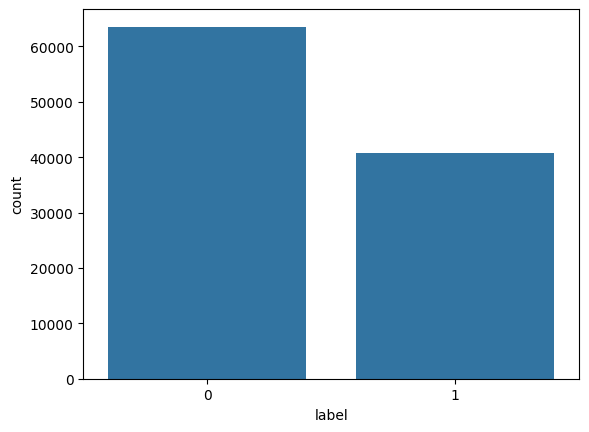

In [8]:
label_dict = dict(df['label'].value_counts())
sns.countplot(x='label', data=df)

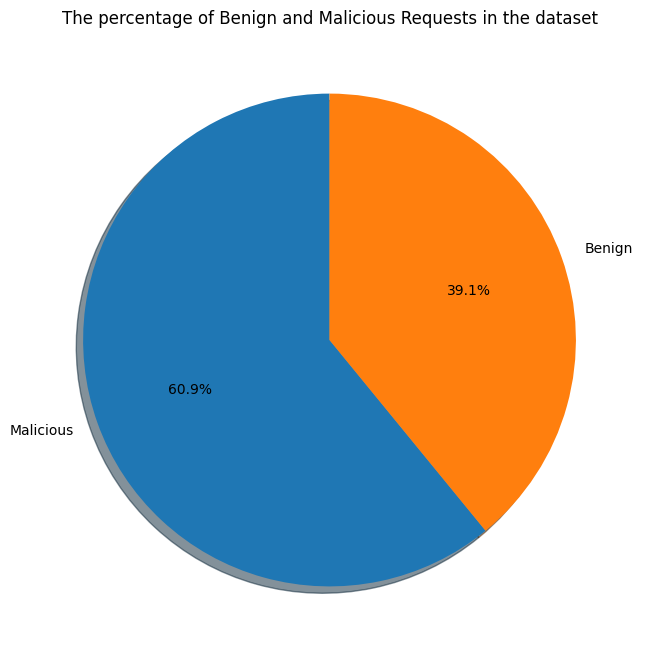

In [9]:
labels = ["Malicious", 'Benign']
sizes = [label_dict[0], label_dict[1]]

plt.figure(figsize=(13, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('The percentage of Benign and Malicious Requests in the dataset')
plt.show()

In [10]:
df.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,1.043450e+05,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,1.043450e+05,104345.000000,103839.000000,103839.000000,104345.000000
mean,17927.514169,4.214260,52860.954746,3.818660e+07,321.497398,4.613880e+08,3.218865e+11,5.654234,5200.383468,6381.715291,4.716150e+06,212.210676,0.600987,2.331094,9.325264e+07,9.328039e+07,998.899756,1003.811420,2007.578742,0.390857
std,11977.642655,1.956327,52023.241460,4.877748e+07,283.518232,2.770019e+08,2.834029e+11,2.950036,5257.001450,7404.777808,7.560116e+06,246.855123,0.489698,1.084333,1.519380e+08,1.330004e+08,2423.471618,2054.887034,3144.437173,0.487945
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,-1.464426e+08,-4365.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7098.000000,3.000000,808.000000,7.957600e+04,127.000000,2.340000e+08,1.270000e+11,3.000000,1943.000000,29.000000,2.842000e+03,0.000000,0.000000,1.000000,4.743000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000
50%,11905.000000,4.000000,42828.000000,6.471930e+06,251.000000,4.180000e+08,2.520000e+11,5.000000,3024.000000,8305.000000,5.521680e+05,276.000000,1.000000,2.000000,4.219610e+06,1.338339e+07,0.000000,0.000000,4.000000,0.000000
75%,29952.000000,5.000000,94796.000000,7.620354e+07,412.000000,7.030000e+08,4.130000e+11,7.000000,7462.000000,10017.000000,9.728112e+06,333.000000,1.000000,3.000000,1.356398e+08,1.439277e+08,251.000000,557.000000,3838.000000,1.000000
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,1.495387e+07,639.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


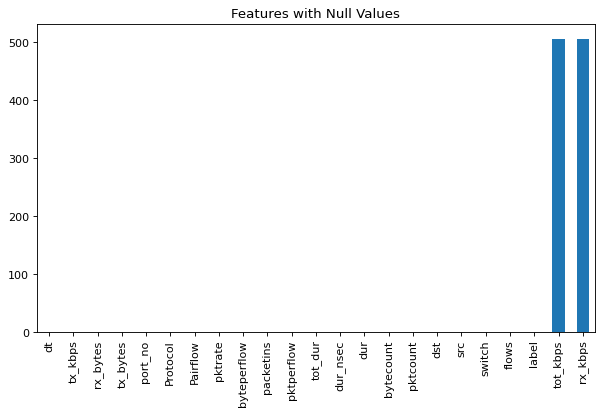

In [11]:
import matplotlib.pyplot as plt

# Create a bar plot of null values
plt.figure(figsize=(9, 5), dpi=80)
df[df.columns[df.isna().sum() >= 0]].isna().sum().sort_values().plot.bar()
plt.title("Features with Null Values")
plt.show()

In [12]:
df.isnull() .sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

In [13]:
# Identify numeric and object columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])
object_df = df.select_dtypes(include=['object'])
numeric_cols = numeric_df.columns
object_cols = object_df.columns

# Print the results
print('Numeric Columns: ')
print(numeric_cols, '\n')

print('Object Columns: ')
print(object_cols, '\n')

print('Number of Numeric Features: ', len(numeric_cols))
print('Number of Object Features: ', len(object_cols))

Numeric Columns: 
Index(['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps',
       'tot_kbps', 'label'],
      dtype='object') 

Object Columns: 
Index(['src', 'dst', 'Protocol'], dtype='object') 

Number of Numeric Features:  20
Number of Object Features:  3


In [14]:
object_df.head()

,src,dst,Protocol
0,10.0.0.1,10.0.0.8,UDP
1,10.0.0.1,10.0.0.8,UDP
2,10.0.0.2,10.0.0.8,UDP
3,10.0.0.2,10.0.0.8,UDP
4,10.0.0.2,10.0.0.8,UDP


In [16]:
import pandas as pd

# Load your data into a DataFrame named 'data'
data = pd.read_csv("D:/download/dataset_sdn.csv")

# Display the first few rows of the DataFrame
data.head()


,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


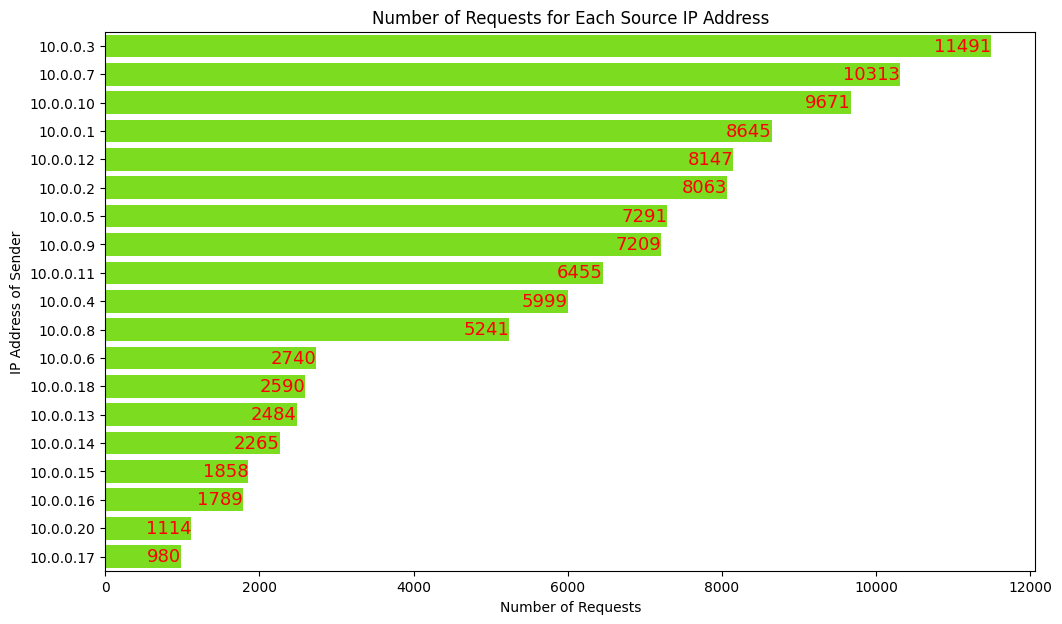

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'src' is the column containing source IP addresses
plt.figure(figsize=(12, 7))
sns.countplot(y='src', data=data, color='lawngreen', order=data['src'].value_counts().index)

# Display the count values on the bars
for idx, count in enumerate(data['src'].value_counts()):
    plt.text(count, idx, str(count), ha='right', va='center', color='r', size=13)

plt.xlabel('Number of Requests')
plt.ylabel('IP Address of Sender')
plt.title('Number of Requests for Each Source IP Address')
plt.show()

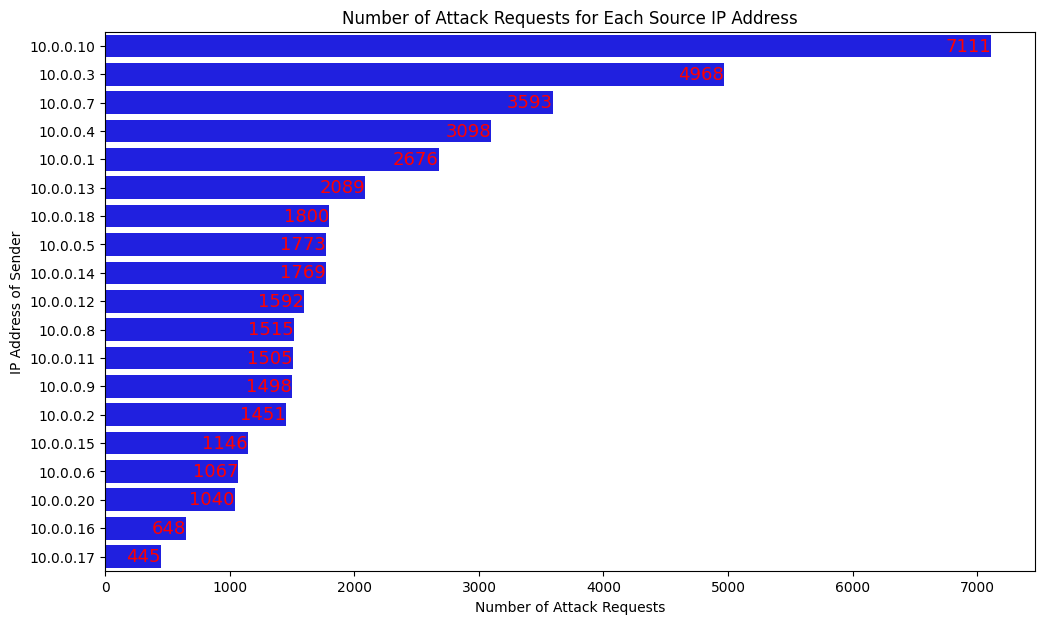

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'src' is the column containing source IP addresses and 'label' is the column containing the attack labels
attack_data = data[data.label == 1]

plt.figure(figsize=(12, 7))
sns.countplot(y='src', data=attack_data, color='blue', order=attack_data['src'].value_counts().index)

# Display the count values on the bars
for idx, count in enumerate(attack_data['src'].value_counts()):
    plt.text(count, idx, str(count), ha='right', va='center', color='r', size=13)

plt.xlabel('Number of Attack Requests')
plt.ylabel('IP Address of Sender')
plt.title('Number of Attack Requests for Each Source IP Address')
plt.show()

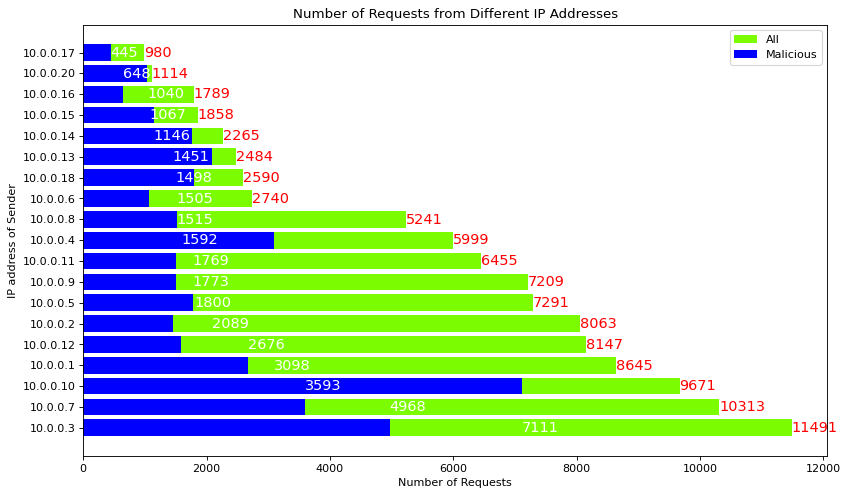

In [19]:
plt.figure(figsize=(12, 7), dpi=80)

# Plot all requests in lawngreen
plt.barh(list(dict(data.src.value_counts()).keys()), dict(data.src.value_counts()).values(), color='lawngreen')

# Plot malicious requests in blue
plt.barh(list(dict(data[data.label == 1].src.value_counts()).keys()), dict(data[data.label == 1].src.value_counts()).values(), color='blue')

# Display the count values on the bars for all requests (red text)
for idx, val in enumerate(dict(data.src.value_counts()).values()):
    plt.text(x=val, y=idx-0.2, s=str(val), color='r', size=13)

# Display the count values on the bars for malicious requests (white text)
for idx, val in enumerate(dict(data[data.label == 1].src.value_counts()).values()):
    plt.text(x=val, y=idx-0.2, s=str(val), color='w', size=13)

plt.xlabel('Number of Requests')
plt.ylabel('IP address of Sender')
plt.legend(['All', 'Malicious'])
plt.title('Number of Requests from Different IP Addresses')
plt.show()

Text(0.5, 1.0, 'The number of requests from different protocols')

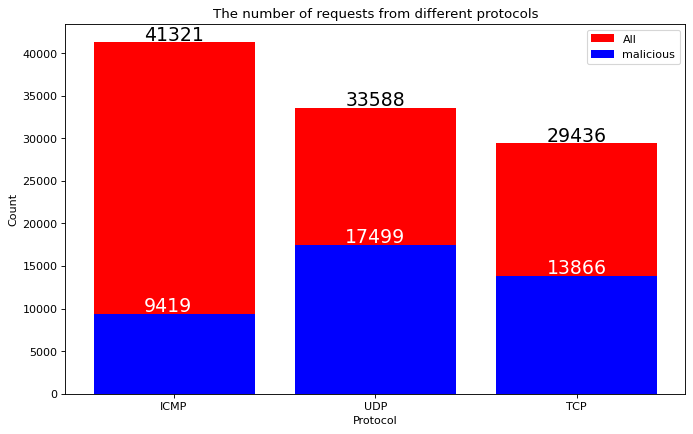

In [20]:
figure(figsize=(10, 6), dpi=80)
plt.bar(list(dict(data.Protocol.value_counts()).keys()), dict(data.Protocol.value_counts()).values(), color='r')
plt.bar(list(dict(data[data.label == 1].Protocol.value_counts()).keys()), dict(data[data.label == 1].Protocol.value_counts()).values(), color='b')

plt.text(x = 0 - 0.15, y = 41321 + 200, s = str(41321), color='black', size=17)
plt.text(x = 1 - 0.15, y = 33588 + 200, s = str(33588), color='black', size=17)
plt.text(x = 2 - 0.15, y = 29436 + 200, s = str(29436), color='black', size=17)

plt.text(x = 0 - 0.15, y = 9419 + 200, s = str(9419), color='w', size=17)
plt.text(x = 1 - 0.15, y = 17499 + 200, s = str(17499), color='w', size=17)
plt.text(x = 2 - 0.15, y = 13866 + 200, s = str(13866), color='w', size=17)

plt.xlabel('Protocol')
plt.ylabel('Count')
plt.legend(['All', 'malicious'])
plt.title('The number of requests from different protocols')

In [21]:
df = data.copy()

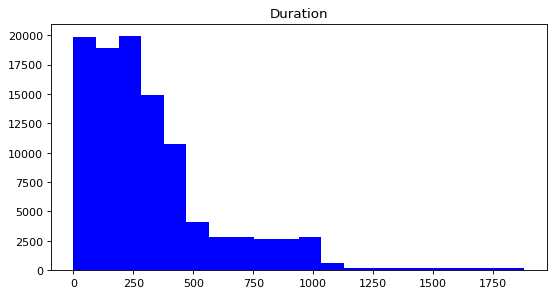

In [22]:
figure(figsize=(8, 4), dpi=80)
plt.hist(df.dur, bins=20, color='b')
plt.title('Duration')
plt.show()

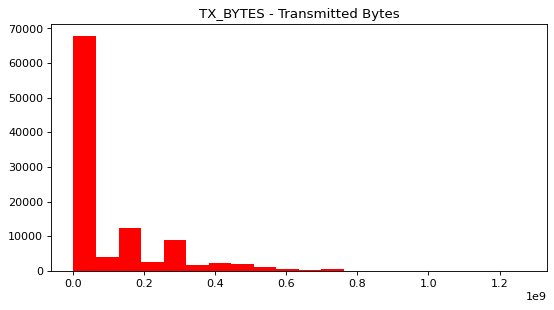

In [23]:
figure(figsize=(8, 4), dpi=80)
plt.hist(df.tx_bytes, bins=20, color='r')
plt.title('TX_BYTES - Transmitted Bytes')
plt.show()

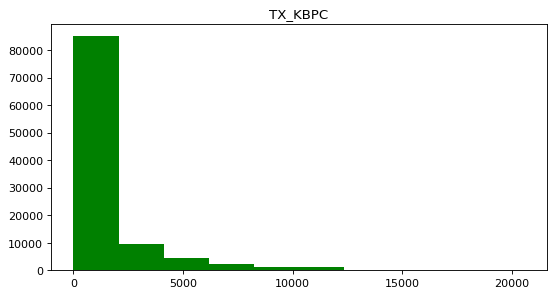

In [24]:
figure(figsize=(8, 4), dpi=80)
plt.hist(df.tx_kbps, bins=10, color='g')
plt.title('TX_KBPC')
plt.show()

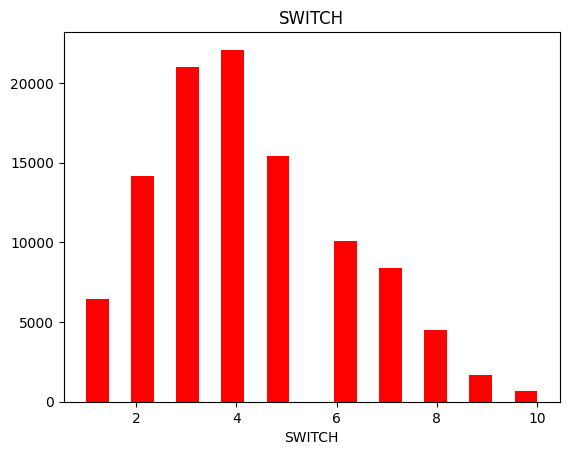

In [25]:
plt.hist(df.switch, bins=20, color='r')
plt.title('SWITCH')
plt.xlabel('SWITCH')
plt.show()

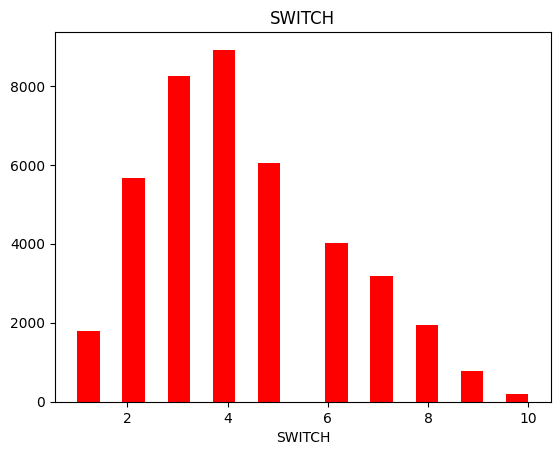

In [26]:
plt.hist(df[df['label'] == 1].switch, bins=20, color='r')
plt.title('SWITCH')
plt.xlabel('SWITCH')
plt.show()

In [27]:
class Model:
    global y
    def __init__(self, data):
        self.data = data
        X = preprocessing.StandardScaler().fit(self.data).transform(self.data)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, random_state=42, test_size=0.3)

    def LogisticRegression(self):
        solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

        start_time = time.time()
        results_lr = []
        accuracy_list = []
        for solver in solvers:
            LR = LogisticRegression(C=0.03, solver=solver).fit(self.X_train, self.y_train)
            predicted_lr = LR.predict(self.X_test)
            accuracy_lr = accuracy_score(self.y_test, predicted_lr)
            #print("Accuracy: %.2f%%" % (accuracy_lr * 100.0))
            #print('################################################################')
            results_lr.append({'solver' : solver, 'accuracy': str(round(accuracy_lr * 100, 2)) + "%",
                                  'Coefficients': {'W' : LR.coef_, 'b': LR.intercept_}})

            accuracy_list.append(accuracy_lr)

        solver_name = solvers[accuracy_list.index(max(accuracy_list))]
        LR = LogisticRegression(C=0.03, solver=solver_name).fit(self.X_train,self.y_train)
        predicted_lr = LR.predict(self.X_test)
        accuracy_lr = accuracy_score(self.y_test, predicted_lr)
        print("Accuracy: %.2f%%" % (accuracy_lr * 100.0), '\n')
        print("########################################################################")
        print('Best solver is : ', solver_name)
        print("########################################################################")
        print(classification_report(predicted_lr, self.y_test), '\n')
        print("########################################################################")
        print("--- %s seconds --- time for LogisticRegression" % (time.time() - start_time))


    def SupportVectorMachine(self):
        start_time = time.time()
        accuracy_list = []
        result_svm = []
        kernels = ['linear', 'poly','rbf', 'sigmoid']
        #kernels = ['rbf']
        for kernel in kernels:
            SVM = svm.SVC(kernel=kernel).fit(self.X_train, self.y_train)
            predicted_svm = SVM.predict(self.X_test)
            accuracy_svm = accuracy_score(self.y_test, predicted_svm)
            result_svm.append({"kernel" : kernel, "accuracy": f"{round(accuracy_svm*100,2)}%"})
            print("Accuracy: %.2f%%" % round((accuracy_svm * 100.0),2))
            print('######################################################################')
            accuracy_list.append(accuracy_svm)

        kernel_name = kernels[accuracy_list.index(max(accuracy_list))]
        SVM = svm.SVC(kernel=kernel_name).fit(self.X_train, self.y_train)
        predicted_svm = SVM.predict(self.X_test)
        accuracy_svm = accuracy_score(self.y_test, predicted_svm)
        print(f"Accuracy of SVM model {round(accuracy_svm,2)*100}%", '\n')
        print("########################################################################")
        print('best kernel is : ', kernel_name)
        print("########################################################################")
        print(classification_report(predicted_svm, self.y_test))
        print("########################################################################")
        print("--- %s seconds ---" % (time.time() - start_time))

    def KNearetsNeighbor(self):
        start_time = time.time()
        Ks = 12
        accuracy_knn = np.zeros((Ks-1))
        std_acc = np.zeros((Ks-1))
        #print(accuracy_knn)
        for n in range(1,Ks):

            #Train Model and Predict
            neigh = KNeighborsClassifier(n_neighbors = n).fit(self.X_train,self.y_train)
            yhat=neigh.predict(self.X_test)
            accuracy_knn[n-1] = metrics.accuracy_score(self.y_test, yhat)


            std_acc[n-1]=np.std(yhat==self.y_test)/np.sqrt(yhat.shape[0])

        #print(accuracy_knn,'\n\n') # courseranyn ozinde tek osy gana jazylyp turdy
        #print(std_acc)
        #accuracy_knn[0] = 0
        plt.figure(figsize=(10,6))
        plt.plot(range(1,Ks),accuracy_knn,'g')
        plt.fill_between(range(1,Ks),accuracy_knn - 1 * std_acc,accuracy_knn + 1 * std_acc, alpha=0.10)
        plt.fill_between(range(1,Ks),accuracy_knn - 3 * std_acc,accuracy_knn + 3 * std_acc, alpha=0.10,color="green")
        plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
        plt.ylabel('Accuracy ')
        plt.xlabel('Number of Neighbors (K)')
        plt.tight_layout()
        plt.show()


        knnc = KNeighborsClassifier()
        knnc_search = GridSearchCV(knnc, param_grid={'n_neighbors': [3, 5, 10],
                                             'weights': ['uniform', 'distance'],
                                             'metric': ['euclidean', 'manhattan']},
                           n_jobs=-1, cv=3, scoring='accuracy', verbose=2)

        knnc_search.fit(self.X_train, self.y_train)
        #print(knnc_search.best_params_)
        #print(knnc_search.best_score_)
        n_neighbors = knnc_search.best_params_['n_neighbors']
        weights = knnc_search.best_params_['weights']
        metric = knnc_search.best_params_['metric']
        KNN = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric, weights=weights).fit(self.X_train,self.y_train)

        predicted_knn = KNN.predict(self.X_test)
        accuracy_knn = metrics.accuracy_score(self.y_test, predicted_knn)
        print(f"Accuracy of KNN model {round(accuracy_knn,2)*100}%", '\n')
        print("########################################################################")
        print(classification_report(predicted_knn, self.y_test))
        print("########################################################################")
        print("--- %s seconds ---" % (time.time() - start_time))

    def DecisionTree(self):
        start_time = time.time()
        tree = DecisionTreeClassifier()
        dt_search = GridSearchCV(tree, param_grid={'criterion' : ['gini', 'entropy'],
                                           'max_depth' : [2,3,4,5,6,7,8, 9, 10],
                                           'max_leaf_nodes' : [2,3,4,5,6,7,8,9,10, 11]},
                           n_jobs=-1, cv=5, scoring='accuracy', verbose=2)

        dt_search.fit(self.X_train, self.y_train)

        criterion = dt_search.best_params_['criterion']
        max_depth = dt_search.best_params_['max_depth']
        max_leaf_nodes = dt_search.best_params_['max_leaf_nodes']

        dtree = DecisionTreeClassifier(criterion=criterion,
                                       max_depth=max_depth,
                                       max_leaf_nodes=max_leaf_nodes).fit(self.X_train, self.y_train)
        predicted_dt = dtree.predict(self.X_test)
        accuracy_dt = metrics.accuracy_score(self.y_test, predicted_dt)
        print(f"criterion: {criterion}, max depth: {max_depth}, max_leaf: {max_leaf_nodes}")
        print(f"The Accuracy is : {round(accuracy_dt * 100,2)}%")
        print("########################################################################")
        print(classification_report(predicted_dt, self.y_test))
        print("########################################################################")

        print("--- %s seconds ---" % (time.time() - start_time))

    def RandomForest(self):
        start_time = time.time()
        RF = RandomForestClassifier(criterion='gini',
                                     n_estimators=500,
                                     min_samples_split=10,
                                     #min_samples_leaf=1,
                                     max_features='auto',
                                     oob_score=True,
                                     random_state=1,
                                     n_jobs=-1).fit(self.X_train, self.y_train)

        predicted_rf = RF.predict(self.X_test)
        svm_accuracy = accuracy_score(self.y_test, predicted_rf)
        print(f"Accuracy of RF is : {round(svm_accuracy*100,2)}%", '\n')
        print("########################################################################")
        print(classification_report(predicted_rf, self.y_test))
        print("########################################################################")

        print("--- %s seconds ---" % (time.time() - start_time))

"""
Decision Tree works Well
Suppert Vector Machine works well
Logistic Regression works well
KNN works well
Random Forest works well
"""

'\nDecision Tree works Well\nSuppert Vector Machine works well\nLogistic Regression works well\nKNN works well\nRandom Forest works well\n'

In [28]:
df = data.copy()
df = df.dropna()

In [29]:
X = df.drop(['dt','src','dst','label'], axis=1)
y = df.label

In [30]:
X = pd.get_dummies(X)

In [31]:
M = Model(X)

In [32]:
## Logistic Regression(Without FS)
M.LogisticRegression()

Accuracy: 76.64% 

########################################################################
Best solver is :  liblinear
########################################################################
              precision    recall  f1-score   support

           0       0.84      0.79      0.81     20024
           1       0.66      0.72      0.69     11128

    accuracy                           0.77     31152
   macro avg       0.75      0.76      0.75     31152
weighted avg       0.77      0.77      0.77     31152
 

########################################################################
--- 6.876303434371948 seconds --- time for LogisticRegression


In [33]:
## Support Vector Machine(Without FS)
M.SupportVectorMachine()

Accuracy: 78.40%
######################################################################
Accuracy: 96.53%
######################################################################
Accuracy: 96.67%
######################################################################
Accuracy: 54.52%
######################################################################
Accuracy of SVM model 97.0% 

########################################################################
best kernel is :  rbf
########################################################################
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     18750
           1       0.97      0.95      0.96     12402

    accuracy                           0.97     31152
   macro avg       0.97      0.96      0.97     31152
weighted avg       0.97      0.97      0.97     31152

########################################################################
--- 1454.1106967926025 seconds ---


In [34]:
## Decision Tree(Without FS)
M.DecisionTree()

Fitting 5 folds for each of 180 candidates, totalling 900 fits
criterion: gini, max depth: 8, max_leaf: 11
The Accuracy is : 98.22%
########################################################################
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     18743
           1       0.99      0.97      0.98     12409

    accuracy                           0.98     31152
   macro avg       0.98      0.98      0.98     31152
weighted avg       0.98      0.98      0.98     31152

########################################################################
--- 133.2567162513733 seconds ---


In [41]:
print(data.columns)


Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')


In [47]:
# Assuming these are your feature columns and target column
feature_columns = ['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur', ...]
target_column = 'label'


In [49]:
print(data.dtypes)


dt               int64
switch           int64
src             object
dst             object
pktcount         int64
bytecount        int64
dur              int64
dur_nsec         int64
tot_dur        float64
flows            int64
packetins        int64
pktperflow       int64
byteperflow      int64
pktrate          int64
Pairflow         int64
Protocol        object
port_no          int64
tx_bytes         int64
rx_bytes         int64
tx_kbps          int64
rx_kbps        float64
tot_kbps       float64
label            int64
dtype: object


In [51]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['src'] = label_encoder.fit_transform(data['src'])
data['dst'] = label_encoder.fit_transform(data['dst'])
data['Protocol'] = label_encoder.fit_transform(data['Protocol'])


In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Load your dataset into a Pandas DataFrame
data = pd.read_csv("D:/download/dataset_sdn.csv")

# Assuming these are your feature columns and target column
feature_columns = ['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps']
target_column = 'label'

# Separate features (X) and target variable (y)
X = data[feature_columns]
y = data[target_column]

# Label encoding for categorical columns and handle missing values
label_encoder = LabelEncoder()
X_copy = X.copy()
X_copy['src'] = label_encoder.fit_transform(X_copy['src'])
X_copy['dst'] = label_encoder.fit_transform(X_copy['dst'])
X_copy['Protocol'] = label_encoder.fit_transform(X_copy['Protocol'])

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_copy = pd.DataFrame(imputer.fit_transform(X_copy), columns=X_copy.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_copy, y, test_size=0.2, random_state=1)

# Your machine learning model code here
# For example, RandomForest
class M:
    def __init__(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def RandomForest(self):
        RF = RandomForestClassifier(criterion='gini',
                                    n_estimators=500,
                                    min_samples_split=10,
                                    oob_score=True,
                                    random_state=1,
                                    n_jobs=-1).fit(self.X_train, self.y_train)
        return RF

    def KNearestNeighbor(self, n_neighbors=5):
        KNN = KNeighborsClassifier(n_neighbors=n_neighbors)
        KNN.fit(self.X_train, self.y_train)
        return KNN

# Example usage
your_model_instance = M(X_train, y_train)
RF_model = your_model_instance.RandomForest()
KNN_model = your_model_instance.KNearestNeighbor(n_neighbors=5)


In [82]:
print(df.describe())

                  dt         switch       pktcount     bytecount  \
count  103839.000000  103839.000000  103839.000000  1.038390e+05   
mean    17999.454165       4.214496   52781.703165  3.801729e+07   
std     11962.227566       1.956320   52061.409178  4.874544e+07   
min      2488.000000       1.000000       0.000000  0.000000e+00   
25%      7128.000000       3.000000     801.000000  7.928200e+04   
50%     11965.000000       4.000000   42557.000000  6.409692e+06   
75%     29982.000000       5.000000   94683.000000  7.597222e+07   
max     42935.000000      10.000000  260006.000000  1.471280e+08   

                 dur      dur_nsec       tot_dur          flows  \
count  103839.000000  1.038390e+05  1.038390e+05  103839.000000   
mean      322.126118  4.613734e+08  3.225151e+11       5.666339   
std       283.926141  2.771020e+08  2.838104e+11       2.951013   
min         0.000000  0.000000e+00  0.000000e+00       2.000000   
25%       128.000000  2.330000e+08  1.280000e+11    

In [86]:
# Example usage
your_model_instance = M(X_train, y_train)
KNN_model = your_model_instance.KNeighborsClassifier()


In [90]:
df1 = data.copy()

In [91]:
df1 = df1.dropna()

In [92]:
df1.columns

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

In [93]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103839 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           103839 non-null  int64  
 1   switch       103839 non-null  int64  
 2   src          103839 non-null  object 
 3   dst          103839 non-null  object 
 4   pktcount     103839 non-null  int64  
 5   bytecount    103839 non-null  int64  
 6   dur          103839 non-null  int64  
 7   dur_nsec     103839 non-null  int64  
 8   tot_dur      103839 non-null  float64
 9   flows        103839 non-null  int64  
 10  packetins    103839 non-null  int64  
 11  pktperflow   103839 non-null  int64  
 12  byteperflow  103839 non-null  int64  
 13  pktrate      103839 non-null  int64  
 14  Pairflow     103839 non-null  int64  
 15  Protocol     103839 non-null  object 
 16  port_no      103839 non-null  int64  
 17  tx_bytes     103839 non-null  int64  
 18  rx_bytes     103839 non-null 

In [96]:
### But we dont need src, dst, dt, So, we will drop them
X = df1[important_features]
y = df1.label

X = X.drop(['src', 'dst', 'dt'], axis=1)

In [97]:
X.head()

,pktcount,byteperflow,pktperflow,pktrate,tot_kbps,rx_kbps,flows,bytecount,Protocol,dur,tot_dur
0,45304,14428310,13535,451,0.0,0.0,3,48294064,UDP,100,1.010000e+11
1,126395,14424046,13531,451,0.0,0.0,2,134737070,UDP,280,2.810000e+11
2,90333,14427244,13534,451,0.0,0.0,3,96294978,UDP,200,2.010000e+11
3,90333,14427244,13534,451,0.0,0.0,3,96294978,UDP,200,2.010000e+11
4,90333,14427244,13534,451,0.0,0.0,3,96294978,UDP,200,2.010000e+11


In [102]:
print(X.columns)


Index(['pktcount', 'byteperflow', 'pktperflow', 'pktrate', 'tot_kbps',
       'rx_kbps', 'flows', 'bytecount', 'Protocol', 'dur', 'tot_dur'],
      dtype='object')


In [105]:
# Drop the specified columns from the DataFrame X
X = X.drop(['dur', 'pktrate', 'pktperflow'], axis=1)


In [9]:
# Display the column names
print(X.columns)

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')


In [15]:
# Anomaly Detection in Network Traffic (e.g., Unusually High Packet Counts)

# Detecting anomalies in packet counts
mean_pktcount = X['pktcount'].mean()
std_pktcount = X['pktcount'].std()

# Assuming anomaly if packet count is beyond 3 standard deviations
anomaly_threshold = mean_pktcount + 3 * std_pktcount
anomalies = X[X['pktcount'] > anomaly_threshold]

print(anomalies)


          dt  switch        src       dst  pktcount  bytecount  dur  \
35054  10959       6  10.0.0.13  10.0.0.3    212328   11465712  353   
35055  10959       6  10.0.0.13  10.0.0.3    212328   11465712  353   
35056  10959       6  10.0.0.13  10.0.0.3    212328   11465712  353   
35057  10959       6  10.0.0.13  10.0.0.3    212328   11465712  353   
35062  10959       2  10.0.0.13  10.0.0.3    212179   11457666  350   
...      ...     ...        ...       ...       ...        ...  ...   
85859   5297       5   10.0.0.8  10.0.0.9    259060   13989240  466   
85860   5297       5   10.0.0.8  10.0.0.9    259060   13989240  466   
85861   5297       5   10.0.0.8  10.0.0.9    259060   13989240  466   
85862   5297       5   10.0.0.8  10.0.0.9    259060   13989240  466   
85863   5297       5   10.0.0.8  10.0.0.9    259060   13989240  466   

        dur_nsec       tot_dur  flows  ...  pktrate  Pairflow  Protocol  \
35054  436000000  3.530000e+11      3  ...      582         1       TCP 

In [26]:
# Identifying common patterns in malicious traffic
common_patterns = malicious.describe().loc['mean']

# Print common patterns
print(common_patterns)

# Add a title
title = "Pattern Recognition in DDoS Attacks"
print(title)
print('-' * len(title))


dt             1.628083e+04
switch         4.282709e+00
pktcount       7.896197e+04
bytecount      5.508326e+07
dur            2.866416e+02
dur_nsec       4.714387e+08
tot_dur        2.870409e+11
flows          4.983327e+00
packetins      5.183043e+03
pktperflow     7.193512e+03
byteperflow    4.572771e+06
pktrate        2.393335e+02
Pairflow       5.709347e-01
port_no        2.324686e+00
tx_bytes       8.374694e+07
rx_bytes       8.373498e+07
tx_kbps        9.798489e+02
rx_kbps        9.865595e+02
tot_kbps       1.973182e+03
label          1.000000e+00
Name: mean, dtype: float64
Pattern Recognition in DDoS Attacks
-----------------------------------


In [27]:
# Hypothesis: Malicious traffic has higher packet rates than benign traffic
t_stat, p_val = stats.ttest_ind(benign['pktrate'], malicious['pktrate'], equal_var=False)

# Print the results
print('T-statistic:', t_stat)
print('P-value:', p_val)

# Add a title
title = "Hypothesis Testing (e.g., Higher Packet Rates in Malicious Traffic)"
print(title)
print('-' * len(title))


T-statistic: -27.83018167804439
P-value: 1.2220396410366039e-169
Hypothesis Testing (e.g., Higher Packet Rates in Malicious Traffic)
-------------------------------------------------------------------


In [28]:
from scipy import stats

# Hypothesis: Malicious traffic has higher packet rates than benign traffic
malicious_pktrate = df[df['label'] == 1]['pktrate']
benign_pktrate = df[df['label'] == 0]['pktrate']

# Perform an independent t-test
t_stat, p_val = stats.ttest_ind(malicious_pktrate, benign_pktrate, equal_var=False)

print('T-statistic:', t_stat)
print('P-value:', p_val)

# Interpretation of the result
if p_val < 0.05:
    print("We reject the null hypothesis, suggesting that malicious traffic has significantly higher packet rates than benign traffic.")
else:
    print("We fail to reject the null hypothesis, indicating no significant difference in packet rates between malicious and benign traffic.")

T-statistic: 27.83018167804439
P-value: 1.2220396410366039e-169
We reject the null hypothesis, suggesting that malicious traffic has significantly higher packet rates than benign traffic.


In [29]:
# Assuming your DataFrame is named 'df'
unique_protocols = df['Protocol'].value_counts()

# Display the unique protocols and their frequencies
print(unique_protocols)


Protocol
ICMP    41321
UDP     33588
TCP     29436
Name: count, dtype: int64
